In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import some data to play with
fraud = pd.read_csv("C://Users//Apeksha//Downloads//Fraud_check.csv",index_col=0)

In [4]:
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [7]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
fraud['Taxable.Income']= label_encoder.fit_transform(fraud['Taxable.Income']) 

In [28]:
x=fraud.iloc[:,1:4]
y=fraud['Taxable.Income']

In [29]:
x

,Taxable.Income,City.Population,Work.Experience
Undergrad,,,
NO,387,50047,10
YES,163,134075,18
NO,186,160205,30
YES,272,193264,15
NO,468,27533,28
...,...,...,...
YES,436,39492,7
YES,395,55369,2
NO,251,154058,0


In [30]:
y

Undergrad
NO     387
YES    163
NO     186
YES    272
NO     468
      ... 
YES    436
YES    395
NO     251
YES    587
NO     569
Name: Taxable.Income, Length: 600, dtype: int64

In [31]:
fraud['Taxable.Income'].unique()

array([387, 163, 186, 272, 468, 158, 483, 350, 485, 581, 121, 336,  13,
       341, 359, 394,  89, 206, 578,  11, 516,  29, 454, 537, 192, 132,
       300, 513,   5, 552, 427, 358, 572, 477,  21, 130,   2, 382,  33,
       429, 277, 265, 568, 398, 162, 470, 135, 236,  42, 242, 462, 209,
       577,  72, 476,  62, 171, 448,   8, 366, 556, 102, 534, 280, 345,
       319, 226, 340,   1, 598, 522, 554, 216, 217, 144, 337, 376, 133,
       424,   3, 240, 175, 371, 510, 391, 110, 203,  27, 505,  99, 444,
       597, 500,  34,   4, 218,  78, 460,  77, 287, 543, 173, 148, 520,
       220, 302,  58, 247, 284, 392,  88, 446, 566, 526,  73, 456, 229,
       297, 123, 573, 285,  65,  69,  98, 403, 509,  40, 433, 580, 292,
       548, 307, 250, 160, 176,  20, 293,  79, 491, 270, 109, 312, 328,
       100, 458, 166, 489, 354, 232, 210, 463, 375,  75,  53,  91, 323,
       201, 261, 111, 346, 511, 549, 308, 103, 262, 529, 266, 214,  54,
       439, 586,  67,  25, 493, 238, 200, 198, 584, 508, 116, 41

In [32]:
fraud.value_counts()

Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
Divorced        3               140885           7                YES      1
Single          33              177575           3                NO       1
                43              129912           30               NO       1
                50              192410           21               YES      1
                51              100961           10               NO       1
                                                                          ..
Married         28              131906           20               YES      1
                30              101996           4                YES      1
                32              176891           27               YES      1
                34              137676           3                YES      1
Single          598             86896            29               NO       1
Length: 600, dtype: int64

In [33]:
colnames = list(fraud.columns)
colnames

['Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

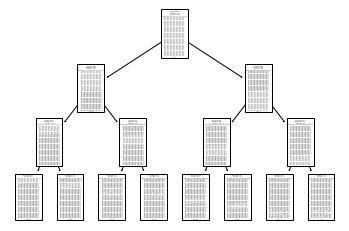

In [36]:
#PLot the decision tree
tree.plot_tree(model);


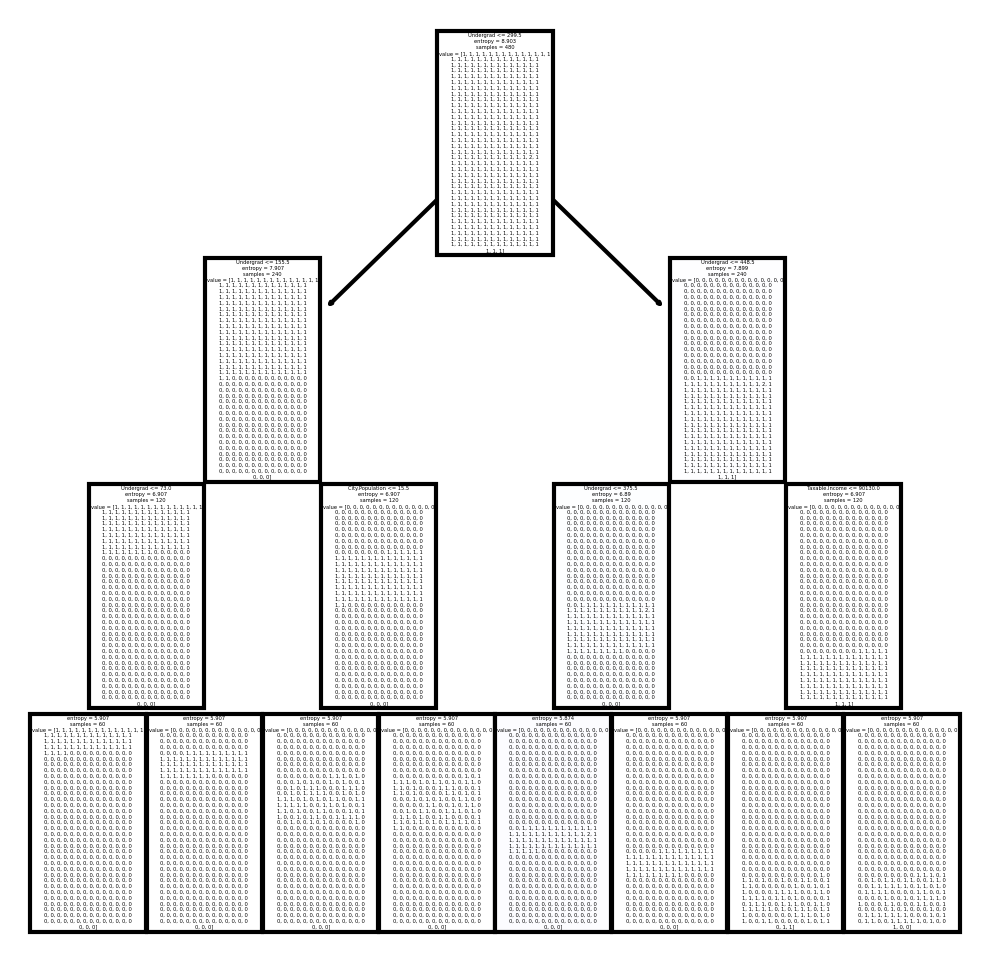

In [37]:
fn=['Undergrad','Taxable.Income','City.Population','Work.Experience']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True);

In [38]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

74     22
449    19
331    17
1      14
376    13
156    13
453    11
159    11
dtype: int64

In [39]:
preds

array([331, 331, 453, 449,  74,  74, 453,   1,   1, 376, 156,  74,  74,
       453,  74,   1, 331, 159, 449, 156, 449,   1, 159, 376,  74, 156,
       453, 449, 453,  74, 159,  74, 331, 156, 159, 376, 453, 376, 376,
       331, 453,   1, 453, 376, 449, 449, 449, 376,  74, 159,  74, 376,
       449, 156, 331, 376, 331,  74, 449, 449, 331, 331,   1,  74, 453,
       331, 449, 156, 159, 449, 159,  74, 331,   1,  74,  74, 449, 331,
        74, 156, 449, 331,   1,   1,  74, 453, 449, 331, 449,   1,  74,
       156, 376, 159,  74,  74, 376, 376, 156,   1, 159, 156,   1, 156,
       331, 159, 156, 331,   1,  74, 156, 159,   1, 449, 376,  74, 331,
       453, 449, 449], dtype=int64)

In [40]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,74,156,159,331,376,449,453
Taxable.Income,,,,,,,,
0,1,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
570,0,0,0,0,0,0,1,0
578,0,0,0,0,0,0,0,1
584,0,0,0,0,0,0,0,1


In [41]:
# Accuracy 
np.mean(preds==y_test)

0.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [43]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.0